In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('hotel_booking.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (119390, 36)

Columns: ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card']

Data Types:
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month     

=== INITIAL DATA EXPLORATION ===

Basic Statistics:
         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.0

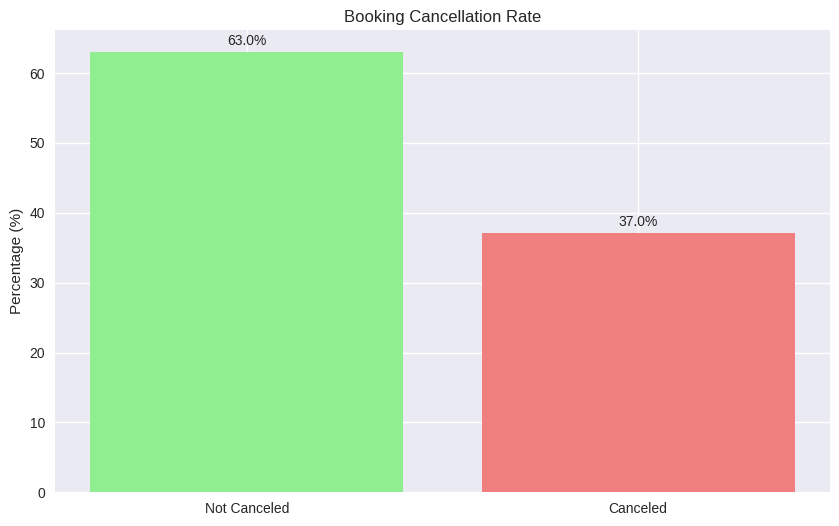

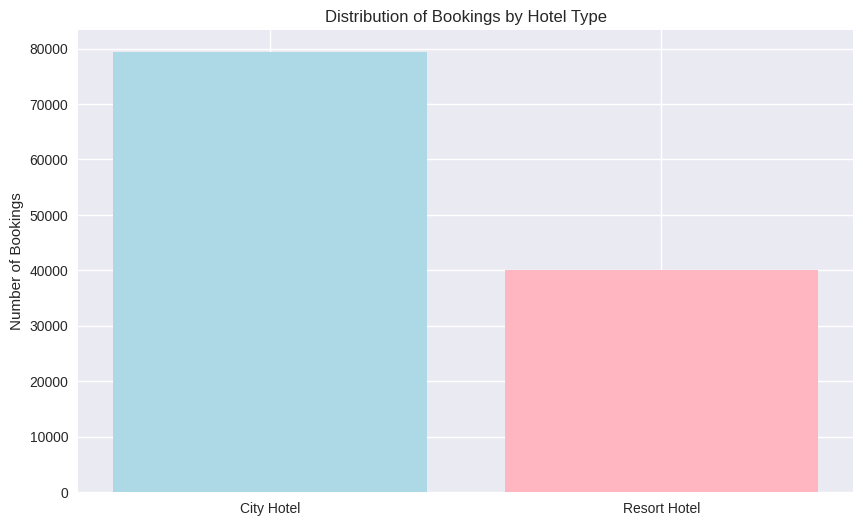

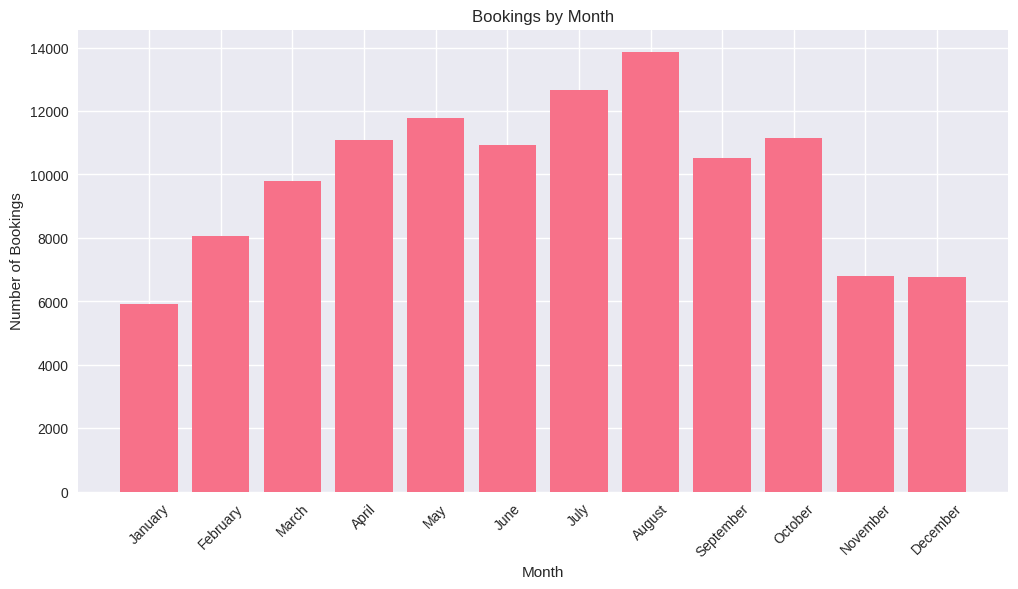

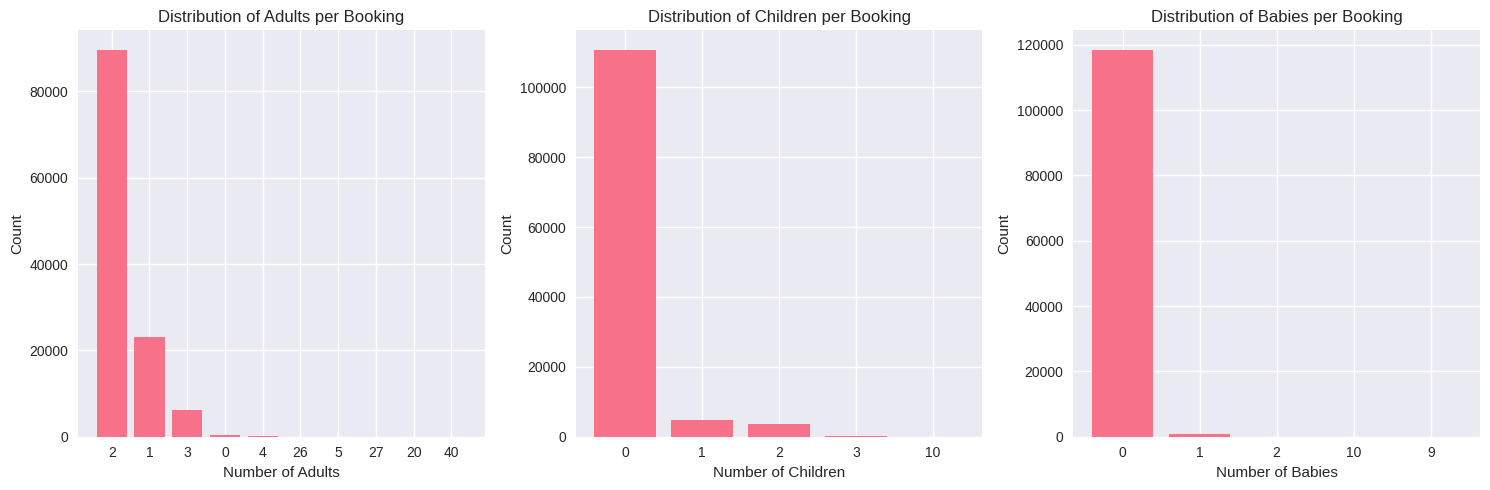

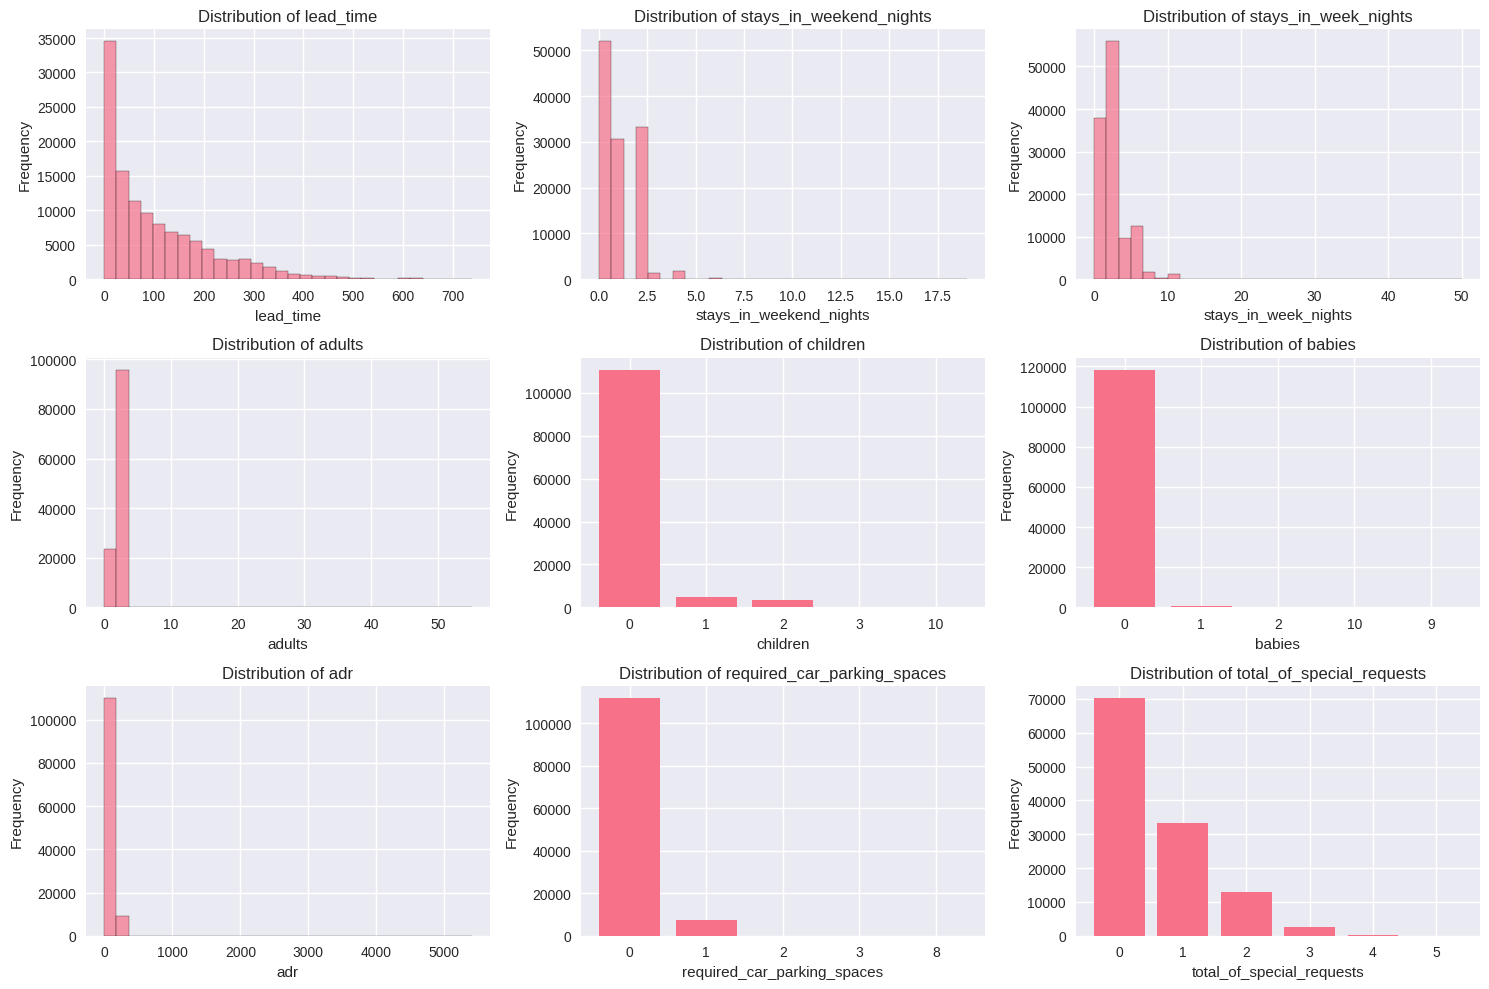

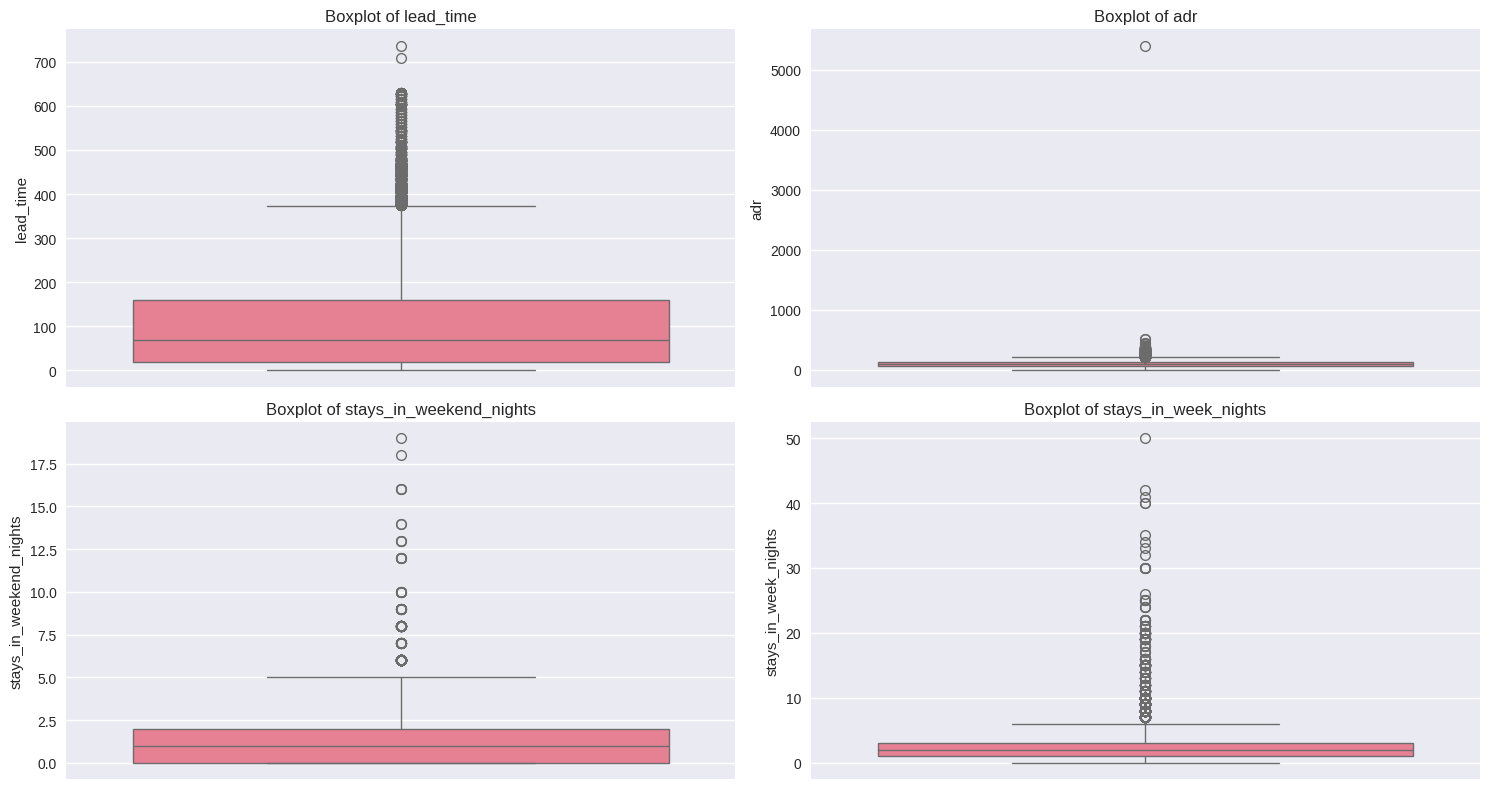

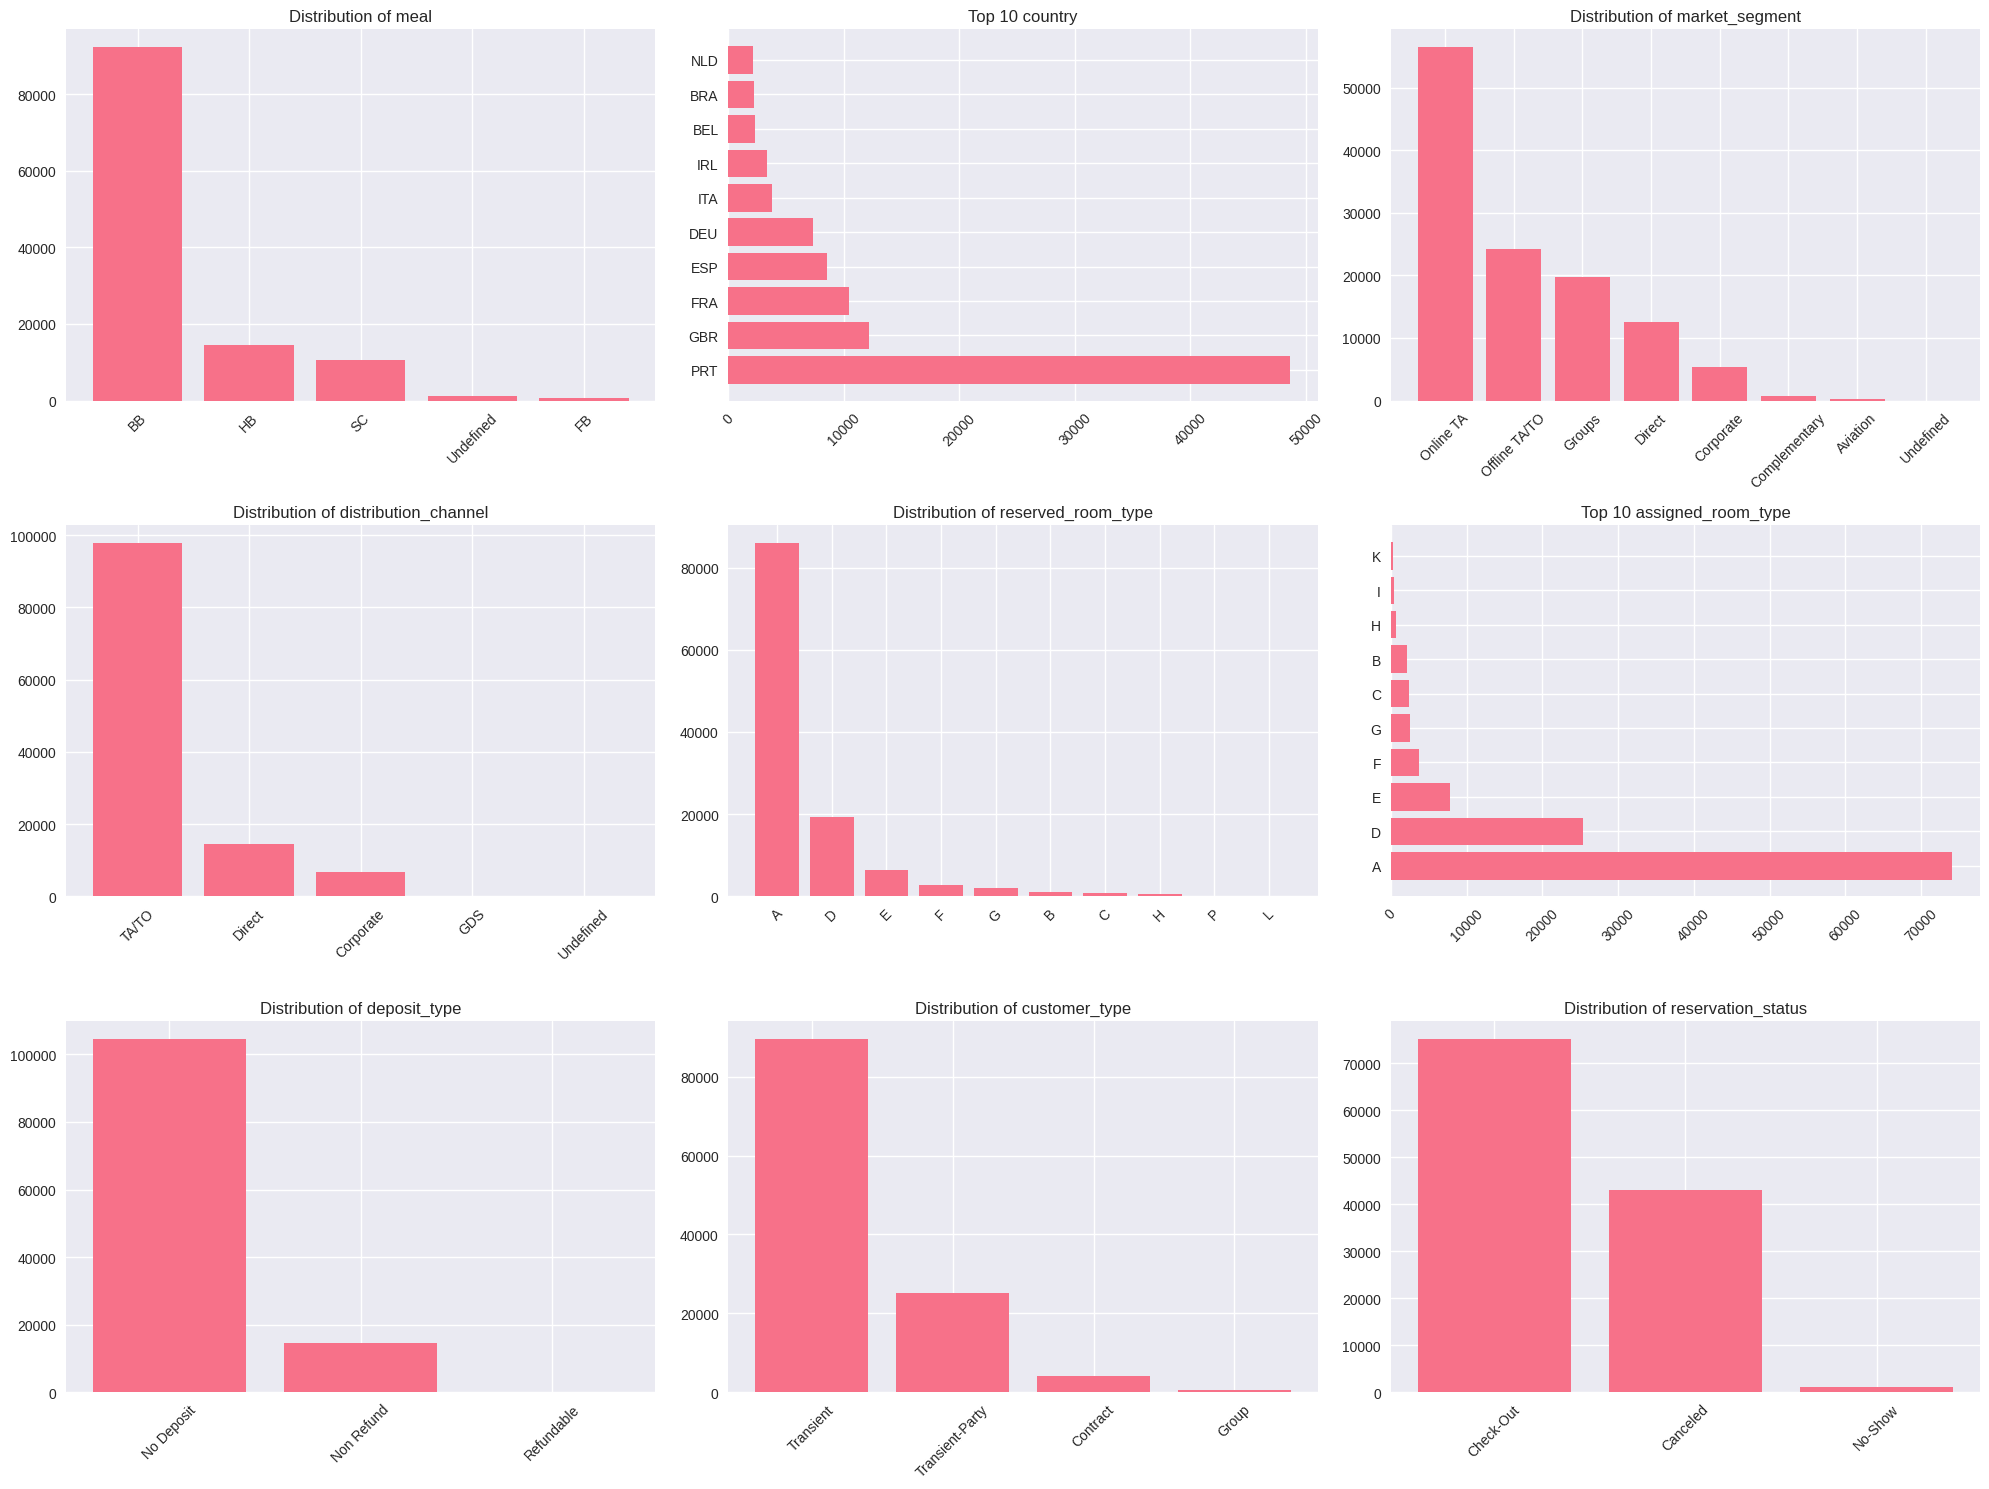

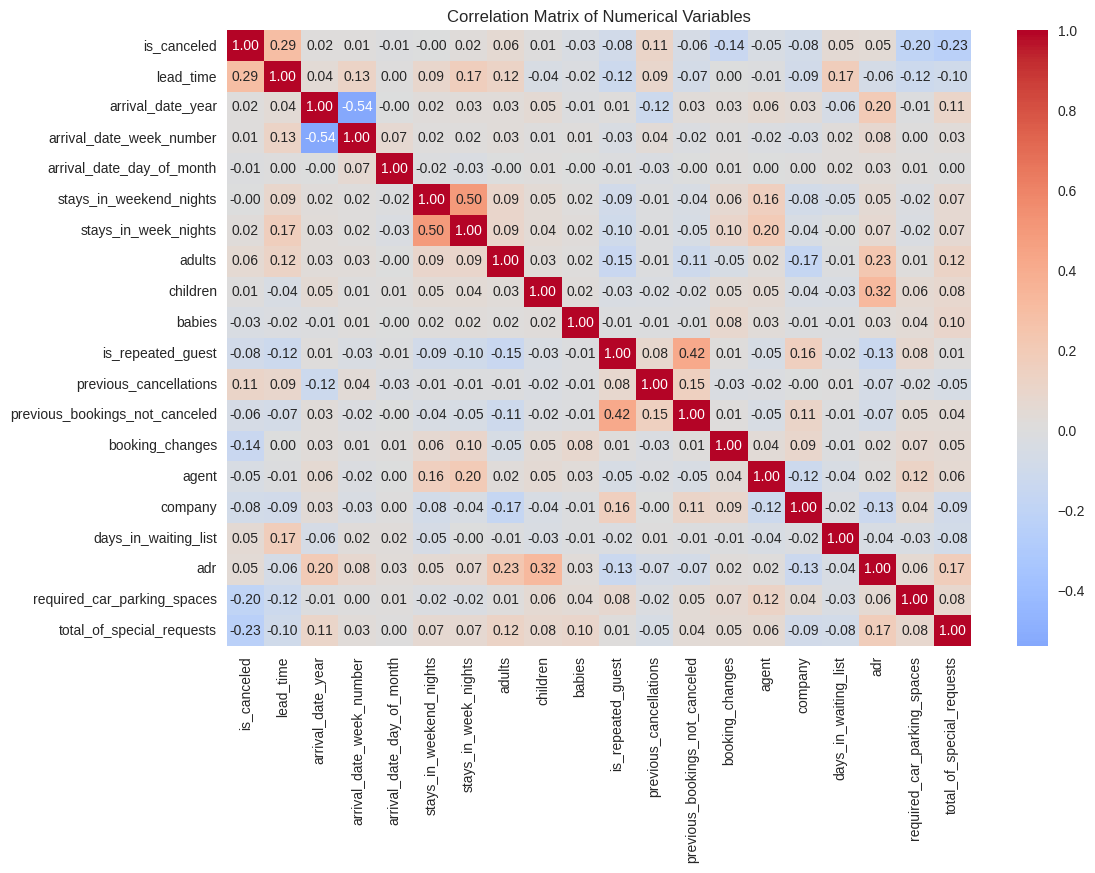

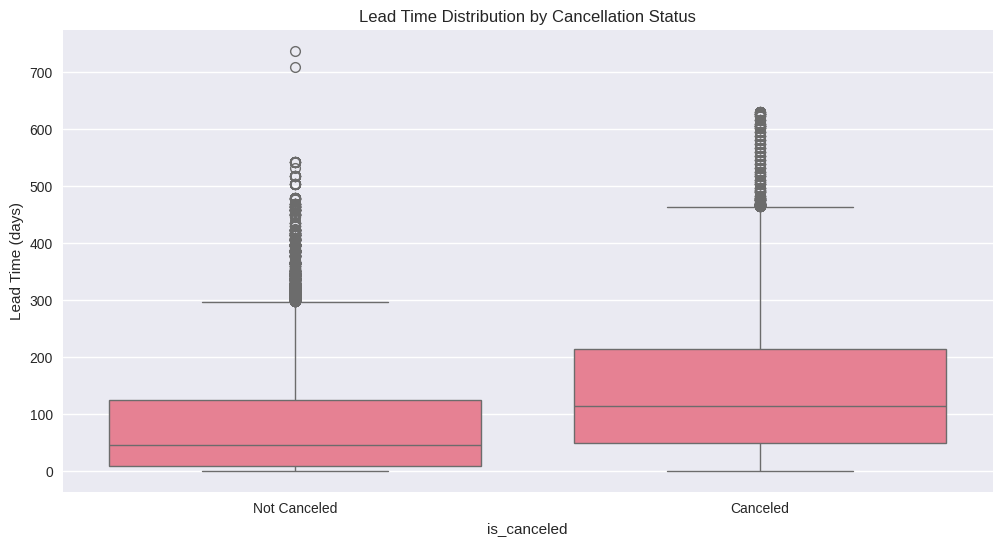

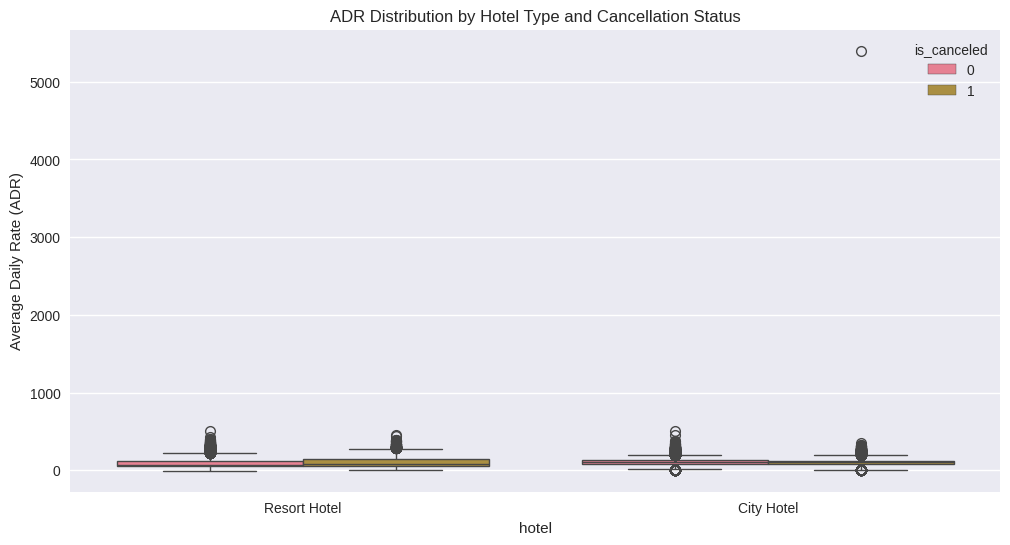


=== DATA QUALITY CHECK ===
Bookings with 0 guests: 180
Bookings with negative ADR: 1

=== FINAL DATASET SUMMARY ===
Original dataset shape: (119390, 36)
Cleaned dataset shape: (119209, 36)
Rows removed: 181

Missing values after cleaning:
0

Cleaned dataset saved as 'hotel_bookings_cleaned.csv'


In [3]:
# 1. INITIAL DATA EXPLORATION
print("=== INITIAL DATA EXPLORATION ===\n")

# Check basic statistics
print("Basic Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False))

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# 2. DATA CLEANING

# Create a copy for cleaning
df_clean = df.copy()

# Handle missing values based on column characteristics
# For 'children', 'babies', 'agent', 'company' - replace nulls with 0
df_clean['children'] = df_clean['children'].fillna(0)
df_clean['babies'] = df_clean['babies'].fillna(0)
df_clean['agent'] = df_clean['agent'].fillna(0)
df_clean['company'] = df_clean['company'].fillna(0)

# For 'country' - replace nulls with 'Unknown'
df_clean['country'] = df_clean['country'].fillna('Unknown')

# Convert data types
df_clean['children'] = df_clean['children'].astype(int)
df_clean['babies'] = df_clean['babies'].astype(int)
df_clean['agent'] = df_clean['agent'].astype(int)
df_clean['company'] = df_clean['company'].astype(int)

# Convert date columns to datetime
df_clean['reservation_status_date'] = pd.to_datetime(df_clean['reservation_status_date'])

# 3. EXPLORATORY DATA ANALYSIS

# 3.1 Target Variable Analysis (is_canceled)
plt.figure(figsize=(10, 6))
cancelation_rate = df_clean['is_canceled'].value_counts(normalize=True) * 100
plt.bar(['Not Canceled', 'Canceled'], cancelation_rate.values, color=['lightgreen', 'lightcoral'])
plt.title('Booking Cancellation Rate')
plt.ylabel('Percentage (%)')
plt.text(0, cancelation_rate[0] + 1, f'{cancelation_rate[0]:.1f}%', ha='center')
plt.text(1, cancelation_rate[1] + 1, f'{cancelation_rate[1]:.1f}%', ha='center')
plt.show()

# 3.2 Hotel Type Analysis
plt.figure(figsize=(10, 6))
hotel_dist = df_clean['hotel'].value_counts()
plt.bar(hotel_dist.index, hotel_dist.values, color=['lightblue', 'lightpink'])
plt.title('Distribution of Bookings by Hotel Type')
plt.ylabel('Number of Bookings')
plt.show()

# 3.3 Temporal Analysis
# Monthly bookings
plt.figure(figsize=(12, 6))
monthly_bookings = df_clean['arrival_date_month'].value_counts()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_bookings = monthly_bookings.reindex(month_order, fill_value=0)
plt.bar(monthly_bookings.index, monthly_bookings.values)
plt.title('Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

# 3.4 Guest Analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
adults_dist = df_clean['adults'].value_counts().head(10)
plt.bar(adults_dist.index.astype(str), adults_dist.values)
plt.title('Distribution of Adults per Booking')
plt.xlabel('Number of Adults')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
children_dist = df_clean['children'].value_counts()
plt.bar(children_dist.index.astype(str), children_dist.values)
plt.title('Distribution of Children per Booking')
plt.xlabel('Number of Children')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
babies_dist = df_clean['babies'].value_counts()
plt.bar(babies_dist.index.astype(str), babies_dist.values)
plt.title('Distribution of Babies per Booking')
plt.xlabel('Number of Babies')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# 3.5 Numerical Variables Analysis
numerical_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                 'adults', 'children', 'babies', 'adr', 'required_car_parking_spaces',
                 'total_of_special_requests']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    if df_clean[col].nunique() > 10:
        plt.hist(df_clean[col], bins=30, alpha=0.7, edgecolor='black')
    else:
        value_counts = df_clean[col].value_counts()
        plt.bar(value_counts.index.astype(str), value_counts.values)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 3.6 Boxplots for numerical variables to detect outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_clean[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# 3.7 Categorical Variables Analysis
categorical_cols = ['meal', 'country', 'market_segment', 'distribution_channel',
                   'reserved_room_type', 'assigned_room_type', 'deposit_type',
                   'customer_type', 'reservation_status']

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    if df_clean[col].nunique() > 10:
        # For countries, show top 10 only
        top_10 = df_clean[col].value_counts().head(10)
        plt.barh(top_10.index.astype(str), top_10.values)
        plt.title(f'Top 10 {col}')
    else:
        value_counts = df_clean[col].value_counts()
        plt.bar(value_counts.index.astype(str), value_counts.values)
        plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3.8 Correlation Matrix
plt.figure(figsize=(12, 8))
numeric_df = df_clean.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# 3.9 Lead Time vs Cancellation
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_canceled', y='lead_time', data=df_clean)
plt.title('Lead Time Distribution by Cancellation Status')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.ylabel('Lead Time (days)')
plt.show()

# 3.10 ADR Analysis by Hotel Type and Cancellation
plt.figure(figsize=(12, 6))
sns.boxplot(x='hotel', y='adr', hue='is_canceled', data=df_clean)
plt.title('ADR Distribution by Hotel Type and Cancellation Status')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

# 4. DATA QUALITY ISSUES AND HANDLING

# Check for impossible values
print("\n=== DATA QUALITY CHECK ===")
print(f"Bookings with 0 guests: {len(df_clean[(df_clean['adults'] == 0) & (df_clean['children'] == 0) & (df_clean['babies'] == 0)])}")
print(f"Bookings with negative ADR: {len(df_clean[df_clean['adr'] < 0])}")

# Handle data quality issues
# Remove bookings with 0 guests (invalid data)
df_clean = df_clean[~((df_clean['adults'] == 0) & (df_clean['children'] == 0) & (df_clean['babies'] == 0))]

# Handle negative ADR values (set to 0 or remove)
df_clean = df_clean[df_clean['adr'] >= 0]

# 5. FINAL DATASET SUMMARY
print("\n=== FINAL DATASET SUMMARY ===")
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")

print("\nMissing values after cleaning:")
print(df_clean.isnull().sum().sum())

# Save cleaned dataset
df_clean.to_csv('hotel_bookings_cleaned.csv', index=False)
print("\nCleaned dataset saved as 'hotel_bookings_cleaned.csv'")